# Module 6, Activity 4: Drawing Spatial Lines

Now we're going to draw lines on maps. Once we know how to draw points and lines, we can plot spatial networks. That's what we're going to do here with some flight route data. Note that we'll need to do some dataset subsetting and merging to get our data in the right shape before plotting, so take your time and make sure you understand what we're doing at each step. Let's get started, importing our packages and the datasets we'll be working with.

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

aus_map = gpd.read_file("data/Australia_Boundaries/")

routes = pd.read_csv("data/flight_routes.csv") # sourced from https://www.kaggle.com/datasets/open-flights/flight-route-database
airport_locs = pd.read_csv("data/airport_locations.csv") # sourced from https://ourairports.com/data/

Each row in the routes dataset is one flight, with the responsible airline's code, the source airport and the destination airport's IATA code. Unfortunately, the dataset doesn't have flight dates, but we don't need that for this activity. Each row in the airport_locs dataset shows the iata_code, name, latitude, longitude, country and city of 57,302 airports and heliports around the world.

In this activity, we want to plot all the unique routes from Qantas (airline code: QF) between Australia's state capitals (excluding Canberra). We can do this using points and lines on a map of Australia. To plot lines, we need the latitude and longitude of the start and end point of each line. So, we'll need to add this information to the routes data before we can visualise it. First, let's subset the routes data to only Qantas flights, and subset the airport_locs data to only Australia's state capitals.

In [4]:
qantas_routes = routes[routes.airline == "QF"]
capitals = ["Brisbane", "Sydney", "Melbourne", "Adelaide", "Hobart", "Perth", "Darwin"]
aus_capitals = airport_locs[(airport_locs.city.isin(capitals)) & (airport_locs.country == "AU")]
aus_capitals

,iata_code,name,latitude,longitude,country,city
9485,ACF,Brisbane Archerfield Airport,-27.570299,153.007996,AU,Brisbane
10480,ADL,Adelaide International Airport,-34.945000,138.531006,AU,Adelaide
11577,NaN,Langley Park Airstrip,-31.961229,115.867867,AU,Perth
11633,NaN,Royal Brisbane Hospital Helipad Charlie,-27.449930,153.027590,AU,Brisbane
11657,NaN,Brisbane Water Police Helipad,-27.401040,153.164150,AU,Brisbane
13384,AVV,Avalon Airport,-38.039398,144.468994,AU,Melbourne
17068,BNE,Brisbane International Airport,-27.384199,153.117004,AU,Brisbane
17526,BWU,Sydney Bankstown Airport,-33.924400,150.988007,AU,Sydney
21416,DRW,Darwin International Airport,-12.414700,130.876999,AU,Darwin
27526,HBA,Hobart International Airport,-42.836102,147.509995,AU,Hobart


We only want international airports for this exercise, so let's filter our aus_capitals dataset again.

In [5]:
aus_international_airports = aus_capitals[aus_capitals.name.str.contains("International")]
aus_international_airports

,iata_code,name,latitude,longitude,country,city
10480,ADL,Adelaide International Airport,-34.945000,138.531006,AU,Adelaide
17068,BNE,Brisbane International Airport,-27.384199,153.117004,AU,Brisbane
21416,DRW,Darwin International Airport,-12.414700,130.876999,AU,Darwin
27526,HBA,Hobart International Airport,-42.836102,147.509995,AU,Hobart
33417,MEL,Melbourne International Airport,-37.673302,144.843002,AU,Melbourne
39945,PER,Perth International Airport,-31.940300,115.967003,AU,Perth
49829,SYD,Sydney Kingsford Smith International Airport,-33.946098,151.177002,AU,Sydney


Now, we need to add the latitude and longitude of our source and destination airports to our Qantas routes dataset. First, let's subset the Qantas routes dataset, to include only flights with sources and destinations from our aus_international_airports dataset.

In [7]:
qantas_caps = qantas_routes[(qantas_routes.iata_source.isin(aus_international_airports.iata_code.unique())) &
                                        (qantas_routes.iata_destination.isin(aus_international_airports.iata_code.unique()))]
qantas_caps                                

,airline,iata_source,iata_destination
46737,QF,ADL,BNE
46739,QF,ADL,DRW
46742,QF,ADL,MEL
46744,QF,ADL,PER
46746,QF,ADL,SYD
46784,QF,BNE,ADL
46794,QF,BNE,DRW
46805,QF,BNE,MEL
46811,QF,BNE,PER
46819,QF,BNE,SYD


Now let's add the name, latitude and longitude of the source and destination cities.

In [8]:
qantas_caps = qantas_caps.merge(aus_international_airports[["iata_code", "city", "longitude", "latitude"]], 
                                 left_on = ["iata_source"], right_on = "iata_code", 
                                 how = "left")

qantas_caps = qantas_caps.merge(aus_international_airports[["iata_code", "city", "longitude", "latitude"]], 
                                 left_on = ["iata_destination"], right_on = "iata_code", 
                                 how = "left", suffixes = ("_source", "_destination"))

qantas_caps = qantas_caps.drop(qantas_caps.filter(regex='iata_code').columns, axis=1)

qantas_caps


,airline,iata_source,iata_destination,city_source,longitude_source,latitude_source,city_destination,longitude_destination,latitude_destination
0,QF,ADL,BNE,Adelaide,138.531006,-34.945000,Brisbane,153.117004,-27.384199
1,QF,ADL,DRW,Adelaide,138.531006,-34.945000,Darwin,130.876999,-12.414700
2,QF,ADL,MEL,Adelaide,138.531006,-34.945000,Melbourne,144.843002,-37.673302
3,QF,ADL,PER,Adelaide,138.531006,-34.945000,Perth,115.967003,-31.940300
4,QF,ADL,SYD,Adelaide,138.531006,-34.945000,Sydney,151.177002,-33.946098
5,QF,BNE,ADL,Brisbane,153.117004,-27.384199,Adelaide,138.531006,-34.945000
6,QF,BNE,DRW,Brisbane,153.117004,-27.384199,Darwin,130.876999,-12.414700
7,QF,BNE,MEL,Brisbane,153.117004,-27.384199,Melbourne,144.843002,-37.673302
8,QF,BNE,PER,Brisbane,153.117004,-27.384199,Perth,115.967003,-31.940300
9,QF,BNE,SYD,Brisbane,153.117004,-27.384199,Sydney,151.177002,-33.946098


**Exercise:** Comment the code in each step above, making sure you understand what each part is doing. Use the [pandas reference website](https://pandas.pydata.org/docs/reference/index.html) to help.

Now we're ready to make a plot. Let's first create a basemap of Australia, with all the flight source locations represented.

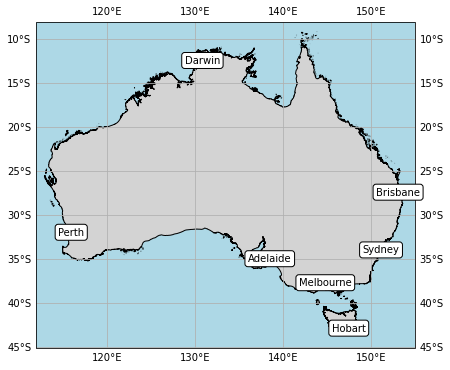

In [9]:
cities = qantas_caps[["city_source", "longitude_source", "latitude_source"]].drop_duplicates()

crss = ccrs.PlateCarree()
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_geometries(aus_map.geometry, crs = crss, facecolor = "#d3d3d3", edgecolor = "black") 
ax.add_feature(cfeature.OCEAN, facecolor = "#add8e6") # Add oceans
ax.add_feature(cfeature.LAND, facecolor = "#add8e6") # Add land
ax.gridlines(draw_labels=True, dms=True) # inbuilt function to add gridlines


for ind in cities.index:
    ax.annotate(cities.city_source[ind], # Text
                xy=[cities.longitude_source[ind], cities.latitude_source[ind]], # Lon and lat coordinates
                xycoords='data', # Tell ax.annotate to use the same CRS as the big_cities dataset
               va = "center", ha = "center", # va - vertical alignment of annotation, ha - horizontal alignment
                bbox=dict(boxstyle="round", facecolor="white")) # bounding box aesthetics    

ax.set_extent([112, # Longitude lower bound (degrees east)
               155, # Longitude upper bound (degrees east)
               -43, # Latitude lower bound (degrees north)
               -8]) # Latitude upper bound (degrees north)
plt.show()

Now, let's add lines showing all the flight routes. We can use [**ax.plot**](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) for this.

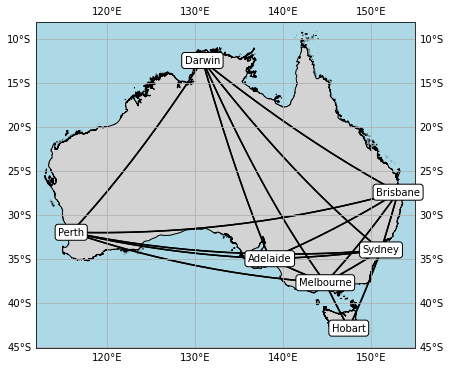

In [10]:
cities = qantas_caps[["city_source", "longitude_source", "latitude_source"]].drop_duplicates()

crss = ccrs.PlateCarree()
crss._threshold = crss._threshold/100  #set finer threshold on projection (for smooth curved lines)
plt.figure(figsize=(12, 6))
ax=plt.axes(projection=crss)

ax.add_geometries(aus_map.geometry, crs = crss, facecolor = "#d3d3d3", edgecolor = "black") 
ax.add_feature(cfeature.OCEAN, facecolor = "#add8e6") # Add oceans
ax.add_feature(cfeature.LAND, facecolor = "#add8e6") # Add land
ax.gridlines(draw_labels=True, dms=True) # inbuilt function to add gridlines


ax.plot([qantas_caps.longitude_source, qantas_caps.longitude_destination],  # Source and destination longitudes (x-coordinates)
        [qantas_caps.latitude_source, qantas_caps.latitude_destination], # Source and destination latitudes (y-coordinates)
        transform=ccrs.Geodetic(), # Lines CRS
        color = "black") 


for ind in cities.index:
    ax.annotate(cities.city_source[ind], # Text
                xy=[cities.longitude_source[ind], cities.latitude_source[ind]], # Lon and lat coordinates
                xycoords='data', # Tell ax.annotate to use the same CRS as the big_cities dataset
               va = "center", ha = "center", # va - vertical alignment of annotation, ha - horizontal alignment
                bbox=dict(boxstyle="round", facecolor="white")) # bounding box aesthetics    

ax.set_extent([112, # Longitude lower bound (degrees east)
               155, # Longitude upper bound (degrees east)
               -43, # Latitude lower bound (degrees north)
               -8]) # Latitude upper bound (degrees north)
plt.show()


Be sure to notice two things in the code above. First, we've set a **threshold** value for our  basemap's CRS projection. If we don't do that, our Geodetic projected lines are not smooth curves. This is a wierd quirk of **Cartopy**. Comment out that line and run the code again to see what the default looks like - especially for longer lines like Brisbane to Perth. Second, we use a different CRS for our lines - Geodetic. A geodetic line gives the smallest distance between two points on a sphere - which is typically the route a plane will take between two locations. If you leave the CRS of the lines as Plate Carree, they will be the shortest line between two points on a flat surface.

**Exercise:** Experiment with the routes and airport locs dataset, using the subsetting steps we went through in this activty. For example, try plotting all flights - domestic and international - that leave Brisbane International Airport (IATA Code: BNE). Or, add all other domestic routes that Qantas flies to the final figure we created, but use different line aesthetics to distinguish them from the major cities we've used already. Think about whether you need to drop the location labels as the number of lines grows, or if you need to change your map's extent to focus on a smaller area.